<a href="https://colab.research.google.com/github/juanxo90/playing_with_python/blob/main/03_python_tabular_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data exploration using python

the data is available in: http://www.openml.org/d/1590

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
census = pd.read_csv('https://raw.githubusercontent.com/juanxo90/playing_with_python/main/data/adult-census.csv')

In [3]:
# we see the first records of the data
census.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# we will try to predict the the income by two clases (binary), we see and counting he data
target_column = "class"
census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [5]:
# we can the numerical and categorical by using info
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [7]:
# from the data, is necessary to separe the categorical and numerical variables
numerical_columns = ["age", "education-num", "capital-gain",
                     "capital-loss", "hours-per-week"]

categorical_columns = ["workclass", "education", "marital-status", "occupation",
                        "relationship", "race", "sex", "native-country"]

all_columns = numerical_columns + categorical_columns + [target_column]

census = census[all_columns]

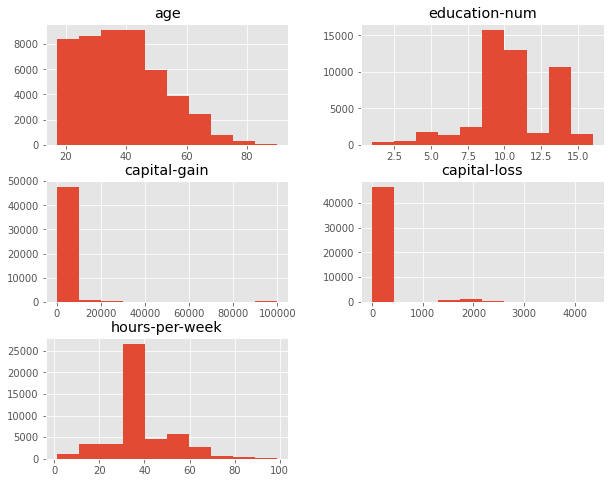

In [9]:
# histogram of all the numerical variables
plt.style.use('ggplot')

_ = census.hist(figsize=(10,8))

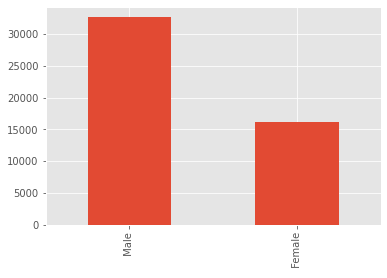

In [13]:
# for the categorical variables we can know the counts per variable
census["sex"].value_counts().plot.bar()

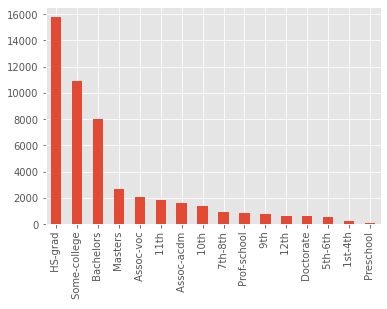

In [17]:
census["education"].value_counts().plot.bar()

In [24]:
# now we look the relationship between education and education num
pd.crosstab(index=census["education"], columns=census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


In [25]:
# as we see education-num and education is showing the same information

# now, seaborn is used to analize the relationship between variables, via the pairplot
import seaborn as sns

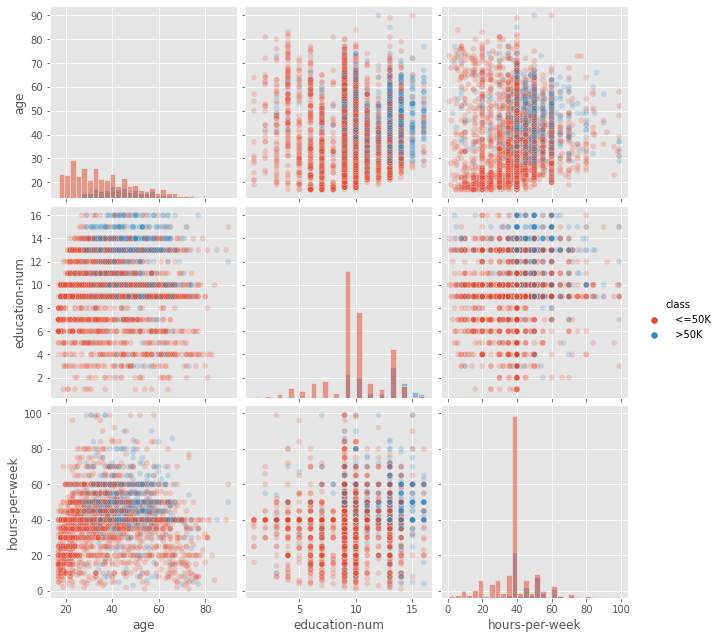

In [28]:
# to make faster the plotting, only cetain number of variables will be ploted
samples_to_plot = 5000

columns = ["age", "education-num", "hours-per-week"]

_ = sns.pairplot(
    data = census[:samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws = {"alpha": 0.2}, #alpha is transparency
    height = 3,
    diag_kind = "hist",
    diag_kws = {"bins":30}
    )

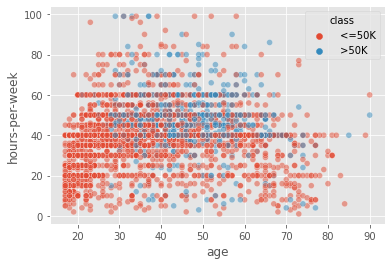

In [30]:
# and creating the scatterplot...
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=census[:samples_to_plot],
    hue="class",
    alpha=0.5
)

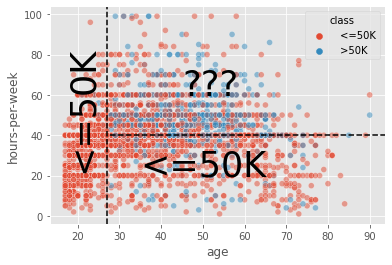

In [32]:
# analizing the data and making decision according the plotted data
ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=census[:samples_to_plot],
    hue="class",
    alpha=0.5
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

Important notes to consider:
* The age < 27 (left region) the prediction is low-income because blue points are not presented.
* The age > 27 and hours-per-week < 40 (bottom-right region), the prediction is low-income. Most of the points are red and only a few blue.
* The age > 27 and hours-per-week > 40 (top-right region), there is a mix of points. It complicated to see which class should predict in this region.